In [31]:
import napf
import numpy as np
import scipy

In [32]:
# get the data into NumPy format
mat_data = scipy.io.loadmat('Geometries.mat')
data = mat_data['Geometries'].T.reshape(-1,1, 50, 50)
data = data.astype('float32')

/tmp/ipykernel_5322/1709067693.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[2].scatter(np.vstack([pos,neg])[:,0], np.vstack([pos,neg])[:,1], c=-np.vstack([pos,neg])[:,2], s=0.1, cmap = cm.get_cmap("seismic"), vmin=-1, vmax=1)
/tmp/ipykernel_5322/1709067693.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = ax.scatter(np.vstack([pos,neg])[:,0], np.vstack([pos,neg])[:,1], c=-np.vstack([pos,neg])[:,2], cmap=cm.get_cmap("Dark2"), s=10, vmin=-0.5, vmax=0.5)


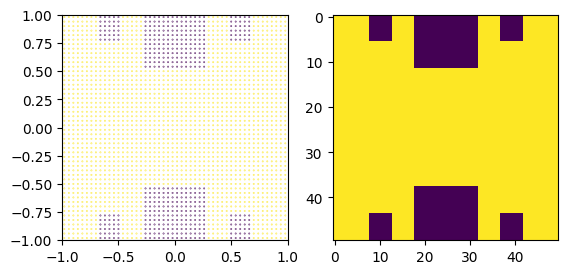

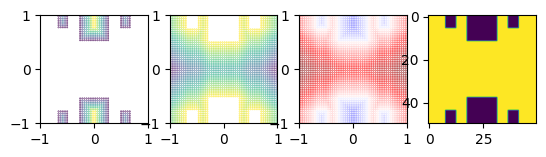

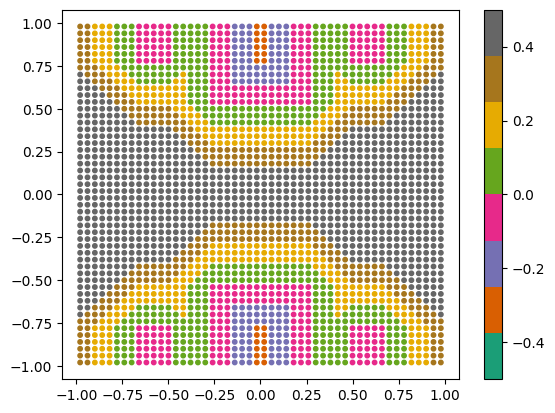

In [33]:
def pixel_to_xy(image, normalized=True):
    image_width = image.shape[1]
    image_height = image.shape[2]
    coords = []
    filled = []
    for x_pixel in range(image_width):
        for y_pixel in range(image_height): 
            # Calculate the corresponding xy coordinates
            x_coord = x_pixel / (image_width) + 1/(2*image_width)
            y_coord = y_pixel / (image_height) + 1/(2*image_width)
            if normalized:
                x_coord = x_coord*2 - 1
                y_coord = y_coord*2 - 1
            coords.append(np.array([x_coord, y_coord]))
            filled.append(image[:,y_pixel, x_pixel])
    return np.array(coords), np.array(filled).astype(bool)


file = 56740

coords, filled =  pixel_to_xy(data[file])


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)


ax[0].scatter(coords[:,0], coords[:,1], c=filled, s=0.1)

ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[0].set_aspect(1)
ax[1].imshow(data[file][0])

image=data[file]

coords, filled =  pixel_to_xy(image)

inside = coords[np.where(filled), :][0]
outside = coords[np.where(np.logical_not(filled)), :][0]


kdt_out2in = napf.KDT(inside, metric=1)
dist_out2in, ind = kdt_out2in.knn_search(outside, 1)

kdt_in2out = napf.KDT(outside, metric=1)
dist_in2out, ind = kdt_in2out.knn_search(inside, 1)
pos = np.hstack([outside, dist_out2in])
neg = np.hstack([inside, -dist_in2out])


fig, ax = plt.subplots(1,4)

ax[0].scatter(outside[:,0], outside[:,1], c=dist_out2in, s=0.1)
ax[1].scatter(inside[:,0], inside[:,1], c=-dist_in2out, s=0.1)
import matplotlib.cm as cm
ax[2].scatter(np.vstack([pos,neg])[:,0], np.vstack([pos,neg])[:,1], c=-np.vstack([pos,neg])[:,2], s=0.1, cmap = cm.get_cmap("seismic"), vmin=-1, vmax=1)

ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[0].set_aspect(1)
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[1].set_aspect(1)
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-1,1)
ax[2].set_aspect(1)
ax[3].imshow(data[file][0])

fig, ax = plt.subplots()

import matplotlib.cm as cm
c = ax.scatter(np.vstack([pos,neg])[:,0], np.vstack([pos,neg])[:,1], c=-np.vstack([pos,neg])[:,2], cmap=cm.get_cmap("Dark2"), s=10, vmin=-0.5, vmax=0.5)
fig.colorbar(c)

In [34]:
import pathlib
def write_npz_file(image, index, path):
    coords, filled =  pixel_to_xy(image)

    inside = coords[np.where(filled), :][0]
    outside = coords[np.where(np.logical_not(filled)), :][0]


    kdt_out2in = napf.KDT(inside, metric=1)
    dist_out2in, ind = kdt_out2in.knn_search(outside, 1)

    kdt_in2out = napf.KDT(outside, metric=1)
    dist_in2out, ind = kdt_in2out.knn_search(inside, 1)
    pos = np.hstack([outside, dist_out2in])
    neg = np.hstack([inside, -dist_in2out])
    np.savez(pathlib.Path(path+str(index)), pos=pos, neg=neg)

for i in range(data.shape[0]):
    path = "../data/SdfSamples/Wang2021/class1/"
    write_npz_file(data[i], i, path)

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

# creating matrix
input_matrix = np.arange(data.shape[0])
print('Input shape: ', input_matrix.shape)
# splitting into two matrices of second matrix by size
second_size = 0.9

X1, X2 = train_test_split(input_matrix, test_size=second_size)

# Data to be written
test_set = {"Wang2021": {"class1": [str(x) for x in X1]}}
training_set = {"Wang2021": {"class1": [str(x) for x in X2]}}

test_set_json = json.dumps(test_set, indent=4)
training_set_json = json.dumps(training_set, indent=4)

with open("../data/splits/wang_test.json", "w") as outfile:
    outfile.write(test_set_json)


with open("../data/splits/wang_training.json", "w") as outfile:
    outfile.write(training_set_json)

Input shape:  (90245,)


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

# creating matrix
input_matrix = np.arange(data.shape[0])
print('Input shape: ', input_matrix.shape)
# splitting into two matrices of second matrix by size
second_size = 0.9

X1_reduced, X2_reduced = train_test_split(X1, test_size=second_size)

# Data to be written
test_set_reduced = {"Wang2021": {"class1": [str(x) for x in X1_reduced]}}
training_set_reduced = {"Wang2021": {"class1": [str(x) for x in X2_reduced]}}

test_set_reduced_json = json.dumps(test_set_reduced, indent=4)
training_set_reduced_json = json.dumps(training_set_reduced, indent=4)

with open("../data/splits/wang_test_reduced.json", "w") as outfile:
    outfile.write(test_set_reduced_json)


with open("../data/splits/wang_training_reduced.json", "w") as outfile:
    outfile.write(training_set_reduced_json)

Input shape:  (90245,)


In [ ]:
import torch

torch.load("../test_experiment/Reconstructions/5/Codes/Wang2021/class1/38063..pth")

tensor([[[ 0.4895,  0.8376, -0.9888, -0.1793, -0.7397, -2.1151,  0.0657,
          -0.3201, -0.0959,  1.0705, -0.6257,  0.5196,  0.9347,  0.2354,
          -1.0530,  0.4798]]], requires_grad=True)